In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
%matplotlib inline
import os

# Data Import

In [2]:
new = pd.read_excel (r"C:\Users\Ankit Dsouza\Desktop\Python Code\myworkbook.xlsx",sheet_name='faithful') #for an earlier version of Excel, you may need to use the file extension of 'xls'

In [34]:
# Looking at the first five rows
new.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [4]:
# Looking at the last five rows
new.tail()

,eruptions,waiting
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46
271,4.467,74


# Data Type

In [5]:
# What type of values are stored in the columns?
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
eruptions    272 non-null float64
waiting      272 non-null int64
dtypes: float64(1), int64(1)
memory usage: 4.4 KB


# Univariate Analysis

In [6]:
# Let's look at some statistical information about
#our dataframe.
new.describe()

,eruptions,waiting
count,272.000000,272.000000
mean,3.487783,70.897059
std,1.141371,13.594974
min,1.600000,43.000000
25%,2.162750,58.000000
50%,4.000000,76.000000
75%,4.454250,82.000000
max,5.100000,96.000000


# Identify & Treatment of Outlier 

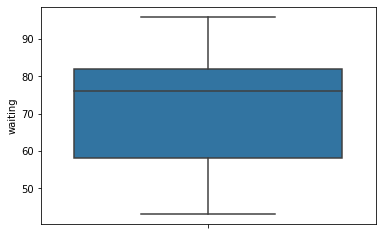

In [36]:
sns.boxplot(y='waiting',data=new)

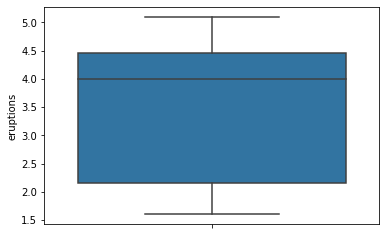

In [8]:
sns.boxplot(y='eruptions',data=new)

# Correlation Matrix

In [9]:
new.corr()

,eruptions,waiting
eruptions,1.000000,0.900811
waiting,0.900811,1.000000


# Bi-variate Analysis

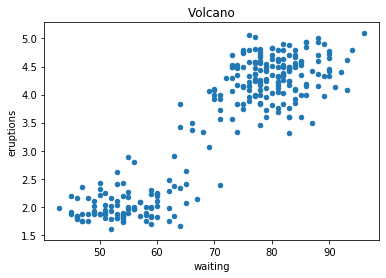

In [10]:
new.plot.scatter(x='waiting', y='eruptions', title='Volcano')

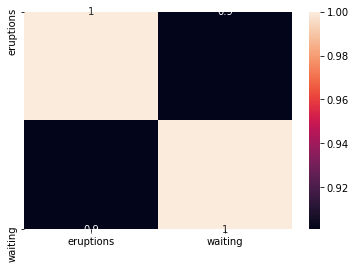

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(new.corr(),annot = True)

# Data Partition 

In [12]:
x=new[['waiting']]
y=new[['eruptions']]
#random_state is the seed used by the random number generator.
#It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x, y, train_size=0.7 ,
                                                   random_state=100)

# Model Building

In [13]:
waiting,eruptions=X_train,y_train

In [14]:
df = pd.concat([waiting, eruptions], axis=1)

In [15]:
df.head()

,waiting,eruptions
65,92,4.400
98,51,1.867
104,81,4.050
48,82,4.633
159,89,3.967


In [16]:
import statsmodels.formula.api as smf
reg = smf.ols('eruptions ~ waiting', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              eruptions   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     757.6
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           7.37e-68
Time:                        14:20:08   Log-Likelihood:                -138.50
No. Observations:                 190   AIC:                             281.0
Df Residuals:                     188   BIC:                             287.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9745      0.203     -9.721      0.000      -2.375      -1.574
waiting        0.0772      0.003     27.524      0.000       0.072       0.083
==============================================================================
Omnibus:                        5.987   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                4.177
Skew:                          -0.220   Prob(JB):                        0.124
Kurtosis:                       2.423   Cond. No.                         402.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumption of Model

* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distibuted

# Linearity

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


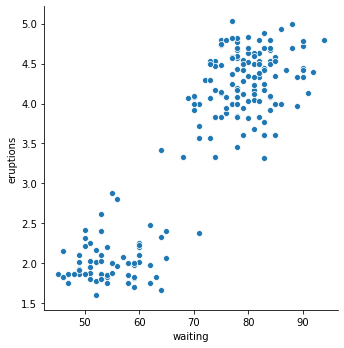

In [17]:
p = sns.pairplot(df, x_vars=['waiting'], y_vars='eruptions',
                 size=5)

In [18]:
df['fitted_value']=reg.fittedvalues
df['residual']=reg.resid

In [19]:
df.head()

,waiting,eruptions,fitted_value,residual
65,92,4.400,5.123585,-0.723585
98,51,1.867,1.960303,-0.093303
104,81,4.050,4.274900,-0.224900
48,82,4.633,4.352053,0.280947
159,89,3.967,4.892126,-0.925126


# Homoscedasicity

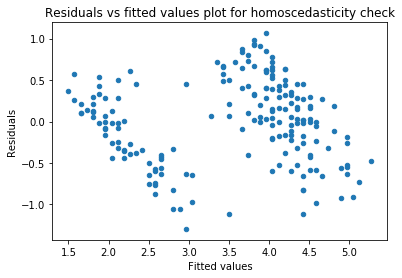

In [22]:
p = df.plot.scatter(x='fitted_value',y='residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

In [23]:
# Run the Breusch-Pagan test
_, pval2, __, f_pval2 =diag.het_breuschpagan(reg.resid, reg.model.exog)
print(pval2, f_pval2)

0.2585279890765837 0.26087972252452807


# Normality

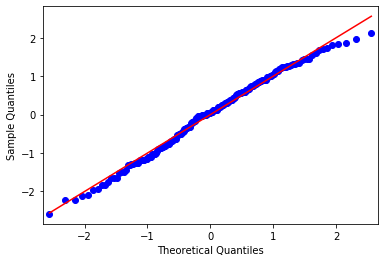

In [24]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import scipy.stats as stats
fig = sm.qqplot(df['residual'], fit=True, line='s') 

# s indicate standardized line
plt.show()

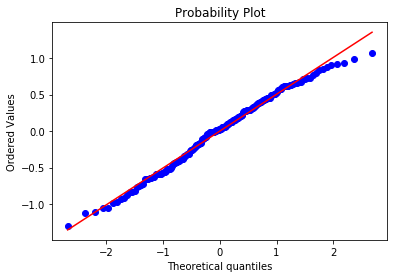

In [25]:
import scipy.stats as stats

stats.probplot(df['residual'], dist="norm", plot=plt)
plt.show()

# Model Error are IID 

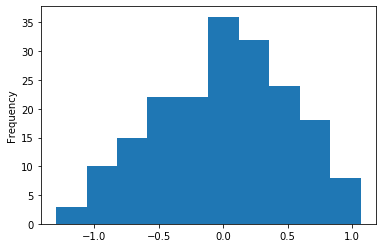

In [26]:
df['residual'].plot.hist()

# Prediction on Test Data (unseen data)

In [37]:
y=-1.9745+0.0772*80
y

4.2015

In [29]:
test=pd.concat([X_test,y_test],axis=1)

In [30]:
test['Predicted']=reg.predict(X_test)

In [31]:
test.head()

,waiting,eruptions,Predicted
59,81,4.317,4.274900
139,79,3.733,4.120594
219,76,4.150,3.889134
134,46,1.833,1.574537
189,55,2.183,2.268916


### MSE & MAE & RMSE for evaluation of Model on test data

In [32]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(test['eruptions'], 
                               test['Predicted'])
# calculate the mean absolute error
model_mae = mean_absolute_error(test['eruptions'],
                                test['Predicted'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.23
MAE 0.382
RMSE 0.48


### MSE & MAE & RMSE for evaluation of Model on train data

In [33]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(df['eruptions'], 
                               df['fitted_value'])
# calculate the mean absolute error
model_mae = mean_absolute_error(df['eruptions'], 
                                df['fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.252
MAE 0.409
RMSE 0.502


# Another Way of Doing Modelling

In [ ]:
x=df[['waiting']]
y=df[['eruptions']]
#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=100)

In [ ]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike SKLearn, statsmodels don't automatically 
#fit a constant, 
#so you need to use the method sm.add_constant(X) 
#in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
model= sm.OLS(y_train,X_train_sm).fit()

In [ ]:
print(model.summary())

# Assumption of Model

In [ ]:
y_train['Fitted_Value']=lm_1.fittedvalues

In [ ]:
y_train['residual']=lm_1.resid

# Homoscedasicity ( Constant Variance )

In [ ]:
y_train.plot.scatter(x='Fitted_Value',y='residual',title='Constant Variance')

# Normality

In [ ]:
import scipy.stats as stats

stats.probplot(y_train['residual'], dist="norm", plot=plt)
plt.show()

# Model Error has to be iid

In [ ]:
import statsmodels 
statsmodels.stats.stattools.durbin_watson(y_train['residual'], axis=0)

# Prediction

In [ ]:
y=-1.974511+0.077153*80
print(y)

In [ ]:
X_test_sm = X_test
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_test_sm = sm.add_constant(X_test_sm)


In [ ]:
lm_1.predict(X_test_sm)